<a href="https://colab.research.google.com/github/huyduong/GNNetworkingChallenge/blob/main/Reliable_ORAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enviroment Setup - Server and VNF Size Control


In [237]:
# importing pandas as pd  
import pandas as pd  
from itertools import zip_longest
import csv
import itertools
import copy

DEBUG = False

#class for coloring output text
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

#Random Seed
random_seed=5

#Server and VNF counts (This can be modified to change the size of the data)
server_counts=12
nearRT_counts=1
oCU_counts=1
oDU_counts=1
constant_delay_threshold=2
delay_Threshold_VnRT_VoCU=2
delay_Threshold_VoCU_VoDU=2

# Server set
S = ['server_'+str(x) for x in range(server_counts)]

p_VnRT=[] #list of all near-RT RIC VNFs
p_VoCU=[] #lisf of all O-CU VNFs
p_VoDU=[] #list of all O-DU VNFs

b_VnRT=[] #list of all backup near-RT RIC VNFs
b_VoCU=[] #lisf of all backup O-CU VNFs
b_VoDU=[] #list of all backup O-DU VNFs

Vp =[] #list of all primary VNFs
Vb =[] #list of all backup VNFs
Vall=[] #all VNFs 

#Fill all sets with sequential IDs
# for s in range(server_counts):
#     S.append([0] * len(Vp))
    
for vnrt in range(nearRT_counts):
    p_VnRT.append("p_near-RT-"+str(vnrt))
    b_VnRT.append("b_near-RT-"+str(vnrt))
    
for vocu in range(oCU_counts):
    p_VoCU.append("p_O-CU-"+str(vocu))
    b_VoCU.append("b_O-CU-"+str(vocu))
    
for vodu in range(oDU_counts):
    p_VoDU.append("p_O-DU-"+str(vodu))
    b_VoDU.append("b_O-DU-"+str(vodu))
    
Vp = p_VnRT + p_VoCU + p_VoDU
# Vredundant=VnRT+VoCU+VoDU
Vb = b_VnRT + b_VoCU + b_VoDU
Vall = Vp + Vb

# Vbackup=[]

# for i in range(len(Vp)):
#   Vbackup.append(i+len(Vp))

Vr_sets = {}
for i in range(nearRT_counts):
  Vr_sets[p_VnRT[i]] = {'p_Near_RT': p_VnRT[i], 'p_OCU': p_VoCU[i], 'p_ODU': p_VoDU[i],
                        'b_Near_RT': b_VnRT[i], 'b_OCU': b_VoCU[i], 'b_ODU': b_VoDU[i]}
  Vdep = {p_VnRT[i]: [p_VoCU[i], b_VoCU[i]],
          b_VnRT[i]: [p_VoCU[i], b_VoCU[i]],
          p_VoCU[i]: [p_VoDU[i], b_VoDU[i]],
          b_VoCU[i]: [p_VoDU[i], b_VoDU[i]]}

print(Vp)
print(Vb)
print("Vall:", Vall)
print(Vr_sets[p_VnRT[0]])



NameError: ignored

In [238]:
print(Vp)

['p_near-RT-0', 'p_O-CU-0', 'p_O-DU-0']


# Print all VNF Lists

In [239]:
#Print all sets
print(f"{bcolors.BOLD}Server IDs:{bcolors.ENDC}",S)
print(f"{bcolors.BOLD}primary near-RT RIC VNFs: {bcolors.ENDC}",p_VnRT)
print(f"{bcolors.BOLD}primary O-CU VNFs: {bcolors.ENDC}",p_VoCU)
print(f"{bcolors.BOLD}primary O-DU VNFs: {bcolors.ENDC}",p_VoDU)

print(f"{bcolors.BOLD}Backup near-RT RIC VNFs:{bcolors.ENDC} ",b_VnRT)
print(f"{bcolors.BOLD}Backup O-CU VNFs: {bcolors.ENDC}",b_VoCU)
print(f"{bcolors.BOLD}Backup O-DU VNFs: {bcolors.ENDC}",b_VoDU)

print(f"{bcolors.OKBLUE}All Primary VNFs:{bcolors.ENDC} ",Vp)
print(f"{bcolors.OKBLUE}All Backup VNFs: {bcolors.ENDC}",Vb)
print(f"{bcolors.OKBLUE}All VNFs: {bcolors.ENDC}",Vall)


Server IDs: ['server_0', 'server_1', 'server_2', 'server_3', 'server_4', 'server_5', 'server_6', 'server_7', 'server_8', 'server_9', 'server_10', 'server_11']
primary near-RT RIC VNFs:  ['p_near-RT-0']
primary O-CU VNFs:  ['p_O-CU-0']
primary O-DU VNFs:  ['p_O-DU-0']
Backup near-RT RIC VNFs:  ['b_near-RT-0']
Backup O-CU VNFs:  ['b_O-CU-0']
Backup O-DU VNFs:  ['b_O-DU-0']
All Primary VNFs:  ['p_near-RT-0', 'p_O-CU-0', 'p_O-DU-0']
All Backup VNFs:  ['b_near-RT-0', 'b_O-CU-0', 'b_O-DU-0']
All VNFs:  ['p_near-RT-0', 'p_O-CU-0', 'p_O-DU-0', 'b_near-RT-0', 'b_O-CU-0', 'b_O-DU-0']


# Export VNF Lists to CSV

In [240]:
#WRITE ALL DATA TO CSV
d = [S, p_VnRT, p_VoCU, p_VoDU, b_VnRT, b_VoCU, b_VoDU]
export_data = zip_longest(*d, fillvalue = '')
with open('numbers.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("S", "VnRT","VoCU","VoDU","b_VnRT","b_VoCU","b_VoDU"))
      wr.writerows(export_data)
myfile.close()


# Create the Servers' Links and Delays 

Delay Matrix
[[  0 737   0 361 859   0   0   0 467 914   0 807]
 [737   0 961   0   0 857   0   0   0 767   0   0]
 [  0 961   0 642 129 960   0   0   0   0   0   0]
 [361   0 642 576   0 894 355 764   0 260 153   0]
 [859   0 129   0   0 580   0   0 215   0 480   0]
 [  0 857 960 894 580   0   0   0 989   0   0 352]
 [  0   0   0 355   0   0   0 489 656   0 204   0]
 [  0   0   0 764   0   0 489   0   0 687   0   0]
 [467   0   0   0 215 989 656   0   0 355   0 113]
 [914 767   0 260   0   0   0 687 355 848 321 517]
 [  0   0   0 153 480   0 204   0   0 321   0   0]
 [807   0   0   0   0 352   0   0 113 517   0 386]]
{'server_0': 0, 'server_1': 737, 'server_2': 0, 'server_3': 361, 'server_4': 859, 'server_5': 0, 'server_6': 0, 'server_7': 0, 'server_8': 467, 'server_9': 914, 'server_10': 0, 'server_11': 807}
{'server_0': 737, 'server_1': 0, 'server_2': 961, 'server_3': 0, 'server_4': 0, 'server_5': 857, 'server_6': 0, 'server_7': 0, 'server_8': 0, 'server_9': 767, 'server_10': 0, 'ser

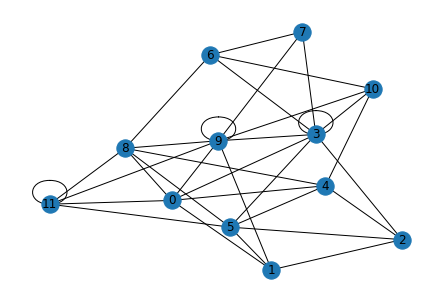

In [241]:
#Server Infrastructure
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
import math

random.seed(random_seed)
np.random.seed(random_seed)

Node_Count=server_counts
SFC_Count=5
Delay_Min=100
Delay_Max=1000
CPU_MAX=255
MEM_MAX=64000

nums = np.random.choice([0, 1], size=(Node_Count,Node_Count),p=([.8, .2]))
Arr = nx.from_numpy_array(nums)
nx.draw(Arr, with_labels=True)
ArrMat=nx.adjacency_matrix(Arr, nodelist=None, weight='weight')
Connections=ArrMat[:,:].toarray()
np.savetxt("Connections.csv", Connections, delimiter=",")
#print("Adjacency Matrix")
#print(Connections)
for (u, v) in Arr.edges():
    Arr.edges[u,v]['weight'] = random.randint(100,1000)
ArrDelayMat=nx.adjacency_matrix(Arr, nodelist=None, weight='weight')
Delays=ArrDelayMat[:,:].toarray()
print("Delay Matrix")
print(Delays)

inter_server_delay = {}

for s in S:
  inter_server_delay[s] = {}

for i in range(len(S)):
  for j in range(len(S)):
    inter_server_delay[S[i]][S[j]] = Delays[i][j]
  print(inter_server_delay[S[i]])




# CPU and Mem for VNFs and Servers

In [242]:

#CPU and Mem for each server
# cpu_mem_S = []
# for c in range(len(S)):
#     cpu_mem_S.append([random.randint(2,20),random.randint(2,20)])

# #CPU and Mem for primary VNFs
# cpu_mem_Vp = []
# for c in range(len(Vp)):
#     cpu_mem_Vp.append([random.randint(2,20),random.randint(2,20)])

random.seed(random_seed)
np.random.seed(random_seed)

#CPU and Mem for servers
cpu_S = {}
for s in S:
    cpu_S[s] = random.randint(20,40)

mem_S = {}
for s in S:
    mem_S[s] = random.randint(20,40)

#CPU and Mem for primary VNFs
cpu_vnf = {}
mem_vnf = {}

for p_vnf in Vp:  # for each primary VNF
    b_vnf = p_vnf.replace('p', 'b')  # b_vnf is the backup of p_vnf
    cpu_vnf[p_vnf] = cpu_vnf[b_vnf] = random.randint(2,20)
    mem_vnf[p_vnf] = mem_vnf[b_vnf] = random.randint(2,20)

#Failover of VNF
fo_Vp = {}
for vnf in Vp:
    fo_Vp[vnf] = random.randint(2,20)

#Regional VNFs (this list should be filled with the IDs of VNFs in the regional cloud (all NRT RIC))
regional_VNF_set = set()
for vnf in p_VnRT + b_VnRT:
    regional_VNF_set.add(vnf) 

#Edge VNFs (this list should be filled with the IDs of VNFs in the Edge cloud (all OCU + ODU))
edge_VNF_set = set()
for vnf in p_VoCU + b_VoCU:
    edge_VNF_set.add(vnf)

for vnf in p_VoDU + b_VoDU:
    edge_VNF_set.add(vnf)

#MUST CHANGE TO MORE REALISTIC APPROACH
# s_regional = []
# for c in range(int(len(S)*0.20)):
#   temp= random.randint(0, len(S))
#   while temp in s_regional:
#     temp=random.randint(0, len(S))
#   s_regional.append(temp)
regional_server_set = random.choices(S, k=int(len(S)*0.20))

#MUST CHANGE TO MORE REALISTIC APPROACH
# s_edge = []
# for c in range(int(len(S)*0.80)):
#   temp1=random.randint(0,len(S))
#   while temp1 in s_regional or temp1 in s_edge:
#     temp1=random.randint(0,len(S))
#   s_edge.append(temp1)
edge_server_set = [x for x in S if x not in regional_server_set]

In [243]:
print(regional_server_set)
print(edge_server_set)
print(cpu_S)
print(cpu_vnf)
print(mem_vnf)
print(mem_S)
print(fo_Vp)

['server_11', 'server_0']
['server_1', 'server_2', 'server_3', 'server_4', 'server_5', 'server_6', 'server_7', 'server_8', 'server_9', 'server_10']
{'server_0': 39, 'server_1': 28, 'server_2': 31, 'server_3': 40, 'server_4': 36, 'server_5': 20, 'server_6': 34, 'server_7': 27, 'server_8': 40, 'server_9': 21, 'server_10': 25, 'server_11': 23}
{'p_near-RT-0': 7, 'b_near-RT-0': 7, 'p_O-CU-0': 7, 'b_O-CU-0': 7, 'p_O-DU-0': 6, 'b_O-DU-0': 6}
{'p_near-RT-0': 14, 'b_near-RT-0': 14, 'p_O-CU-0': 4, 'b_O-CU-0': 4, 'p_O-DU-0': 16, 'b_O-DU-0': 16}
{'server_0': 31, 'server_1': 35, 'server_2': 27, 'server_3': 32, 'server_4': 37, 'server_5': 23, 'server_6': 38, 'server_7': 27, 'server_8': 20, 'server_9': 26, 'server_10': 33, 'server_11': 28}
{'p_near-RT-0': 6, 'p_O-CU-0': 6, 'p_O-DU-0': 2}


# MTTF and MTTR for VNFs and Servers

In [244]:
random.seed(random_seed)
np.random.seed(random_seed)

#mttf and mttr for each server
mttf_S = {}
for s in S:
    mttf_S[s] = random.randint(2,20)

mttr_S = {}
for s in S:
    mttr_S[s] = random.randint(2,20)

#mttf and mttr for each primary VNF
mttf_Vp = {}
for v in Vp:
    mttf_Vp[v] = random.randint(2,20)

mttr_Vp = {}
for v in Vp:
    mttr_Vp[v] = random.randint(2,20)
    
#mttf and mttr for each backup VNF
mttf_Vb = {}
for v in Vb:
    mttf_Vp[v] = random.randint(2,20)

mttr_Vb = {}
for v in Vb:
    mttr_Vp[v] = random.randint(2,20)

# Availablity of vnf v when it is installed on server s.
# They are parameters 'c' in the model.
c = {}
for vp in Vp:
  c[vp] = {}
  for s in S:
    c[vp][s] = (1/mttf_S[s]+mttf_Vp[vp])/((1/mttf_S[s]+mttf_Vp[vp])+mttr_S[s]+mttr_Vp[vp])

# The infamous Gamma Set

In [245]:
# Gamma_prime_set=[[[[1,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,0,0,0]],[[1,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,0,0,0]]],
#                  [[[1,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,0,0,0]]],
#                  [[[1,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,0,0,0]]],
#                  [[[1,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,0,0,0]]],]

Gamma_prime_set = {}

class TwoTreeConfiguration:
  p_Near_RT = None
  p_OCU     = None
  p_ODU     = None
  b_Near_RT = None
  b_OCU     = None
  b_ODU     = None

  # def __init__(self):
  #   pass

  def __init__(self, p_Near_RT=None, p_OCU=None, p_ODU=None, 
               b_Near_RT=None, b_OCU=None, b_ODU=None):
    self.p_Near_RT = p_Near_RT  # a pair of (name of vnf, location)
    self.p_OCU     = p_OCU
    self.p_ODU     = p_ODU
    self.b_Near_RT = b_Near_RT
    self.b_OCU     = b_OCU
    self.b_ODU     = b_ODU
  
  def __str__(self):
    return "p_Near_RT: {}, p_OCU: {}, p_ODU: {}, b_Near_RT: {}, b_OCU: {}, b_ODU:{}" \
          .format(self.p_Near_RT , self.p_OCU, self.p_ODU,
            self.b_Near_RT, self.b_OCU, self.b_ODU)
          
  def get_VNF_and_location_pairs(self):
    return [self.p_Near_RT, self.p_OCU, self.p_ODU, 
            self.b_Near_RT, self.b_OCU, self.b_ODU]

  def get_primary_VNF_and_location_pairs(self):
    return [self.p_Near_RT, self.p_OCU, self.p_ODU]



# Master Problem


Next tasks:
- add NearRIC infor into gamma
- correct the right hand side of constraints. Currently, they are all 0
- read chapter 13, cutting stock. If it's too difficult, refresh with chapter 2, 5, 7.

Idea for extensions:
- throughput


In [246]:
%pip install gurobipy  # For Colab, Gurobi must be installed
import gurobipy as gp
from gurobipy import GRB


m = gp.Model("Master Problem")

z_var_set = []

const_28={}
const_29={}
const_30={}

# At most one configuration for a near RT
for v in Vp:                 #(28)
  const_28[v]=m.addLConstr(0, GRB.LESS_EQUAL, 1, "const_28_" + str(v))

#CPU Constraint
for s in S:                  #(29)
  const_29[s]=m.addLConstr(0, GRB.LESS_EQUAL, cpu_S[s], "const_29_"+str(s))
    
#Mem Constraint
for s in S:                  #(30)
  const_30[s]=m.addLConstr(0, GRB.LESS_EQUAL, mem_S[s], "const_30_"+str(s))
              
exp = gp.LinExpr()
m.setObjective(exp, GRB.MAXIMIZE)  # see https://www.gurobi.com/documentation/9.1/refman/py_model_setobjective.html

for near_RT_vnf in Gamma_prime_set.keys():
    for config in Gamma_prime_set[near_RT_vnf]: # for every two tree configuration
      add_configuration(config)  

#########################################################
def add_configuration(config):  # add a two-tree config to the master
  # theta=Gamma_prime_set[i][n]
  col = gp.Column()
  Vr_vnf_location_pairs = config.get_VNF_and_location_pairs() 
  Vr_primary_vnf_location_pairs = config.get_primary_VNF_and_location_pairs()

# objective coefficient of z
  Obj_coeff=0
  for vp, s in Vr_primary_vnf_location_pairs:
    Obj_coeff += c[vp][s]

#28
  for p_vnf, s in Vr_primary_vnf_location_pairs:
    # temp_const_28 = sum(theta[v])
    col.addTerms(1, const_28[p_vnf])

#29
  temp_const_29 = {}  
  for _, s in Vr_vnf_location_pairs:
    temp_const_29[s] = 0

  # compute the cpu used at each server
  for v, s in Vr_vnf_location_pairs:
    temp_const_29[s] += cpu_vnf[v]

  # then add the column
  for _, s in Vr_vnf_location_pairs:
    col.addTerms(temp_const_29[s], const_29[s])

#30
  temp_const_30 = {}  # inside this loop, gamma and s are fixed
  for _, s in Vr_vnf_location_pairs:
    temp_const_30[s] = 0

  # compute the mem used at each server
  for v, s in Vr_vnf_location_pairs:
    temp_const_30[s] += mem_vnf[v]
  
  # then add the column
  for _, s in Vr_vnf_location_pairs:
    col.addTerms(temp_const_30[s], const_30[s])

# add variable
  z = m.addVar( lb=0.0, ub=GRB.INFINITY, obj=Obj_coeff, vtype=GRB.CONTINUOUS, name="z_"+str(len(z_var_set)), column=col )
  z_var_set.append((z, copy.deepcopy(config)))   
#########################################################

# our model is not QCP, so we don't need to set the following parameter
# m.setParam(GRB.Param.QCPDual,1)   # enable calculating the Dual Values

m.optimize() 

m.write("master.lp")
m.write("masterMPS.mps")


Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 27 rows, 0 columns and 0 nonzeros
Model fingerprint: 0x6f4c2dfb
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 27 rows and 0 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective -0.000000000e+00


# Dual Values

In [247]:
duals = m.getAttr("Pi", m.getConstrs())

#To manually retrive duals
# print(len(duals))
# print(duals)
# uvs_28=duals[0:len(Vp)]
# uvs_29=duals[len(Vp):len(Vp)+len(S)]
# uvs_30=duals[len(Vp)+len(S):len(Vp)+len(S)+len(S)]


uvs_28= m.getAttr("Pi", const_28)
uvs_29= m.getAttr("Pi",const_29)
uvs_30= m.getAttr("Pi",const_30)



print(uvs_28)
print(uvs_29)
print(uvs_30)

print(len(uvs_28))
print(len(uvs_29))
print(len(uvs_30))

{'p_near-RT-0': 0.0, 'p_O-CU-0': 0.0, 'p_O-DU-0': 0.0}
{'server_0': 0.0, 'server_1': 0.0, 'server_2': 0.0, 'server_3': 0.0, 'server_4': 0.0, 'server_5': 0.0, 'server_6': 0.0, 'server_7': 0.0, 'server_8': 0.0, 'server_9': 0.0, 'server_10': 0.0, 'server_11': 0.0}
{'server_0': 0.0, 'server_1': 0.0, 'server_2': 0.0, 'server_3': 0.0, 'server_4': 0.0, 'server_5': 0.0, 'server_6': 0.0, 'server_7': 0.0, 'server_8': 0.0, 'server_9': 0.0, 'server_10': 0.0, 'server_11': 0.0}
3
12
12


# Pricing Problem

In [248]:
#Pricing Problem  V1
# How to get dual value: https://www.gurobi.com/documentation/9.1/refman/pi.html

def pricing_problem(near_rt_ric):

  uv_28= m.getAttr("Pi", const_28)
  us_29= m.getAttr("Pi", const_29)
  us_30= m.getAttr("Pi", const_30)

  pp = gp.Model("Pricing Problem")

  Vr=Vr_sets[near_rt_ric].values() #input to the pricing 

  const_36={}
  const_37={}
  const_38={}
  const_39={}
  const_40={}
  const_41={}

  #CR"HAT"

  sum_cvs_theta_vs = gp.LinExpr()
  sum_u28_theta_vs = gp.LinExpr()
  sum_u29_theta_vs = gp.LinExpr()
  sum_u30_theta_vs = gp.LinExpr()

  # add theta variables
  theta = {}
  for v in Vr:
    theta[v] = {}
    for s in S:
      theta[v][s] = pp.addVar(vtype=GRB.BINARY, name="theta_"+v+'_'+s)

  for v in Vr:
    for s in S:
      if v in Vp:
        sum_cvs_theta_vs += theta[v][s] * c[v][s]
        sum_u28_theta_vs += theta[v][s] * uv_28[v]
      
      sum_u29_theta_vs += theta[v][s] * us_29[s] * cpu_vnf[v]
      sum_u30_theta_vs += theta[v][s] * us_30[s] * mem_vnf[v]

  c_r = sum_cvs_theta_vs - sum_u28_theta_vs - sum_u29_theta_vs - sum_u30_theta_vs

  # print(c_r)

  #####################

  #36
  for v in Vr:   
    lhs = gp.quicksum([theta[v][s] for s in S])
    const_36[v]=pp.addLConstr(lhs, GRB.EQUAL, 1,"const_36_"+v)      

  #37 how to implement the for alls? 
  # for v in Vr:
  #   for v_prime in Vdep[v]:
  for v in Vr:
    const_37[v] = {}
    if v not in Vdep.keys(): # v has no dependency
      continue

    for v_prime in Vdep[v]:
      if v_prime not in const_37[v]:
        const_37[v][v_prime] = {}
      for s in S:
        const_37[v][v_prime][s] = {}
        for s_prime in S:
          # print('v({}), v_prime({}), s({}), s_prime({})'.format(v, v_prime, s, s_prime))
          # todo: MUST CHANGE constant_delay_threshold TO dynamic
          exp = gp.LinExpr()
          exp = inter_server_delay[s][s_prime] * (theta[v][s]+theta[v_prime][s_prime]-1)
          name = "const_37_{}_{}_{}_{}".format(v, v_prime, s, s_prime)
          const_37[v][v_prime][s][s_prime] = \
             pp.addLConstr(exp, GRB.LESS_EQUAL, constant_delay_threshold, \
                           name=name)
          # pp.addConstr(Delays[s][s_prime]*(theta[v,s]+theta[v_prime,s_prime]-1),GRB.LESS_EQUAL,constant_delay_threshold,)
      
  #38 create a new list Vregional
  # https://www.gurobi.com/documentation/9.1/refman/py_quicksum.html#pythonmethod:quicksum
  for v in Vr:
    if v in regional_VNF_set:                 
      lhs = gp.quicksum([theta[v][s] for s in regional_server_set])
      const_38[v] = pp.addLConstr(lhs, GRB.EQUAL, 1, name="const_38_"+str(v))
      
  #39 create a new list Vedge
  for v in Vr:
    if v in edge_VNF_set:                 
      lhs = gp.quicksum([theta[v][s] for s in edge_server_set])
      const_39[v] = pp.addLConstr(lhs, GRB.EQUAL, 1 , name="const_39_"+str(v))

        
  #Failovers #missing for all vRD in model #create Rd and primary
  # for v in Vr[r]:
  #   if vpri in Vprimary and fo_Vp[v] > fo_Vp[???]:
  #     const_40[vpri]=m.addConstr(theta[][]+theta[][]<1,name="const_40_"+str(vpri))

  #40
  for p_vnf, s in list(itertools.product(Vr, S)) :
    if p_vnf in Vp: # p_vnf is primary VNF
      const_40[p_vnf] = {}
      b_vnf = p_vnf.replace('p', 'b')  # b_vnf is the corresponding backup VNF
      const_40[p_vnf][s] = pp.addLConstr(theta[p_vnf][s]+theta[b_vnf][s], GRB.LESS_EQUAL, 1, name="const_40_"+v+'_'+s)

  #41
  # for v in Vr[r]:
  #   for v_hat in Vdep[v]:
  #     for s in range(len(S)):
  #       if fo_Vp[v] > fo_Vp[v_hat]:
  #         const_41[s]=pp.addConstr(theta[v,s]+theta[v_hat,s], GRB.LESS_EQUAL,1,name="const_41_"+str(s))

  pp.setObjective(c_r, GRB.MAXIMIZE)
  pp.Params.OutputFlag = 0
  pp.optimize() 
  pp.write("pp.lp")
  pp.write("pp.sol")

  return pp, theta

In [249]:
test_pp, test_theta = pricing_problem(p_VnRT[0])

In [250]:
print(p_VnRT)

['p_near-RT-0']


In [251]:
def get_configuration_from_pricing_problem(r, pp, theta):
  # {'p_Near_RT': p_VnRT[0], 'p_OCU': p_VoCU[0], 'p_ODU': p_VoDU[0],
  # 'b_Near_RT': b_VnRT[0], 'b_OCU': b_VoCU[0], 'b_ODU': b_VoDU[0]}
  config = TwoTreeConfiguration()
  Vr = Vr_sets[r]
  
  # primary Near RT
  vnf = Vr['p_Near_RT']
  assert vnf in theta
  for s in S:
    if theta[vnf][s].X > 0.9:
      config.p_Near_RT = (vnf, s)

  # backup Near RT
  vnf = Vr['b_Near_RT']
  assert vnf in theta
  for s in S:
    if theta[vnf][s].X > 0.9:
      config.b_Near_RT = (vnf, s)
  
  # primary OCU
  vnf = Vr['p_OCU']
  assert vnf in theta
  for s in S:
    if theta[vnf][s].X > 0.9:
      config.p_OCU = (vnf, s)

  # backup OCU
  vnf = Vr['b_OCU']
  assert vnf in theta
  for s in S:
    if theta[vnf][s].X > 0.9:
      config.b_OCU = (vnf, s)

  # primary ODU
  vnf = Vr['p_ODU']
  assert vnf in theta
  for s in S:
    if theta[vnf][s].X > 0.9:
      config.p_ODU = (vnf, s)

  # backup ODU
  vnf = Vr['b_ODU']
  assert vnf in theta
  for s in S:
    if theta[vnf][s].X > 0.9:
      config.b_ODU = (vnf, s)
    
  return config
  

# Main Algorithm's flow

In [253]:
# import MasterModel

# master_LP = gp.Model("LP RMP Problem")

# initialize_model(master_LP, initial_configurations)  # add variables and contraints
m.Params.OutputFlag = 0  # reduce log printing
m.write('master_init.lp')
new_configutations = [None]
iter_count = 0
while len(new_configutations) > 0:
  new_configurations = []
  m.optimize()
  print(m.getAttr("Pi", const_28))
  print(m.getAttr("Pi", const_29))
  print(m.getAttr("Pi", const_30))
  print('iter_count = {}, master LP = {}'.format(iter_count, m.objVal))
  iter_count += 1

  for r in p_VnRT:  # TODO: check the correctness of the pricing model
    pp, theta = pricing_problem(r)    
    if pp.objVal > 0.00001:
      new_configurations.append(get_configuration_from_pricing_problem(r, pp, theta))
      print('r = {}, rc = {}'.format(r, pp.objVal))

  if len(new_configurations) == 0:
    break
  
  for configuration in new_configurations:
    add_configuration(configuration)  # TODO: check the correctness of the master after we add configuration (column)
  
  if DEBUG:
    if iter_count < 10 :
      m.write('master_{}.lp'.format(iter_count))  

z_star_LP = m.objVal

for z, _ in z_var_set:
  z.vtype = GRB.BINARY

#master_ILP = turn_master_LP_into_master_ILP(master_LP)
m.optimize()

z_tilde_ILP = m.objVal

{'p_near-RT-0': 1.3528401224714965, 'p_O-CU-0': 0.0, 'p_O-DU-0': 0.0}
{'server_0': 0.0, 'server_1': 0.0, 'server_2': 0.0, 'server_3': 0.0, 'server_4': 0.0, 'server_5': 0.0, 'server_6': 0.0, 'server_7': 0.0, 'server_8': 0.0, 'server_9': 0.0, 'server_10': 0.0, 'server_11': 0.0}
{'server_0': 0.0, 'server_1': 0.0, 'server_2': 0.0, 'server_3': 0.0, 'server_4': 0.0, 'server_5': 0.0, 'server_6': 0.0, 'server_7': 0.0, 'server_8': 0.0, 'server_9': 0.0, 'server_10': 0.0, 'server_11': 0.0}
iter_count = 0, master LP = 1.3528401224714965


In [254]:
print("z_star_LP = ", z_star_LP)
print("z_tilde_ILP = ", z_tilde_ILP)
gap = (z_star_LP - z_tilde_ILP) / (0.00001+z_tilde_ILP) * 100.0
print("gap = {} (%)".format(gap))

z_star_LP =  1.3528401224714965
z_tilde_ILP =  1.3528401224714965
gap = 0.0 (%)


In [255]:
if DEBUG:
  for _, config in z_var_set:
    print(config)

p_Near_RT: ('p_near-RT-0', 'server_11'), p_OCU: ('p_O-CU-0', 'server_6'), p_ODU: ('p_O-DU-0', 'server_5'), b_Near_RT: ('b_near-RT-0', 'server_0'), b_OCU: ('b_O-CU-0', 'server_7'), b_ODU:('b_O-DU-0', 'server_2')


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# for i in range(nearRT_counts):
#   print(new_configurations[i])